<a href="https://colab.research.google.com/github/Praxis-QR/PythonForManagers/blob/main/Superstore_Sales_Data_Analysis_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

# Python Pandas - Introduction
Demonstrating the usage of basic Pandas Commands to explore Data in a relative large dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# https://www.kaggle.com/datasets/laibaanwer/superstore-sales-dataset?resource=download
dataURL = 'https://github.com/Praxis-QR/PythonForManagers/raw/main/Data/SuperStoreSalesKaggle.zip'
dfS3K = pd.read_csv(dataURL)
dfS3K.head(1)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.14,35.46,Medium,2011


#First Look

In [5]:
#How many rows, columns
dfS3K.shape

(51290, 21)

In [6]:
#Reduce the data, drop some columns, particularly customer name
#allColumns = list(dfS3K.columns)
#allColumns

In [7]:
dropColumns = ['order_id',  'customer_name']
dfS3K.drop(dropColumns, axis=1, inplace= True)
dfS3K.shape

(51290, 19)

In [8]:
#is there any missing value? In this case, not
dfS3K.count()

order_date        51290
ship_date         51290
ship_mode         51290
segment           51290
state             51290
country           51290
market            51290
region            51290
product_id        51290
category          51290
sub_category      51290
product_name      51290
sales             51290
quantity          51290
discount          51290
profit            51290
shipping_cost     51290
order_priority    51290
year              51290
dtype: int64

In [9]:
#what are the different datatypes? 
# sales should be float64 but is object or string. Why?
dfS3K.dtypes

order_date         object
ship_date          object
ship_mode          object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

In [10]:
#dfS3K.sales is type object or string
dfS3K['sales'] = dfS3K['sales'].str.replace(',', '')    # replace , with blank
dfS3K['sales'] = pd.to_numeric(dfS3K['sales'])          # convert column "a" of a DataFrame
dfS3K.sales

0        408
1        120
2         66
3         45
4        114
        ... 
51285     14
51286      4
51287     26
51288      7
51289      3
Name: sales, Length: 51290, dtype: int64

In [11]:
# what is the first and last order date ?
# we have four years of data, but date format changes ...
dfS3K['order_date'].describe

<bound method NDFrame.describe of 0          1/1/2011
1          1/1/2011
2          1/1/2011
3          1/1/2011
4          1/1/2011
            ...    
51285    31-12-2014
51286    31-12-2014
51287    31-12-2014
51288    31-12-2014
51289    31-12-2014
Name: order_date, Length: 51290, dtype: object>

In [12]:
dfS3K['ship_date'] = pd.to_datetime(dfS3K['ship_date']).dt.strftime('%d/%m/%Y')
dfS3K['order_date'] = pd.to_datetime(dfS3K['order_date']).dt.strftime('%d/%m/%Y')
#dfS3K['order_date'].describe

In [13]:
#How many countries, markets, regions, segments
len(dfS3K['country'].unique()), len(dfS3K['market'].unique()), len(dfS3K['region'].unique()), len(dfS3K['segment'].unique())

(147, 7, 13, 3)

In [14]:
#How many product_id, category, sub_category, product_name
len(dfS3K['product_id'].unique()), len(dfS3K['category'].unique()), len(dfS3K['sub_category'].unique()), len(dfS3K['product_name'].unique())

(10292, 3, 17, 3788)

#One Dimensional Analysis : Top 10s

In [15]:
# Countries with maximum sales
AllNumeric = ['sales','quantity','discount','profit','shipping_cost']
dfS3K.groupby('region').sum()[AllNumeric].round(decimals = 2)
dfS3K.groupby('region').sum()[AllNumeric].sort_values('sales',axis=0, ascending= False).round(decimals = 2)

,sales,quantity,discount,profit,shipping_cost
region,,,,,
Central,2822399,41762,1543.61,311403.98,296940.56
South,1600960,25206,990.44,140355.77,168474.07
North,1248192,18021,459.63,194597.95,131474.09
Oceania,1100207,12838,534.10,121666.64,120628.51
Southeast Asia,884438,11822,851.33,17852.33,93675.84
North Asia,848349,8851,113.90,165578.42,95030.61
EMEA,806184,11517,986.10,43897.97,88375.73
Africa,783776,10564,718.80,88871.63,88139.47
Central Asia,752839,7715,138.20,132480.19,77830.15


In [16]:
#Countries with maximum profits
AllNumeric = ['sales','quantity','discount','profit','shipping_cost']
dfS3K.groupby('country').sum()[AllNumeric].round(decimals = 2)
dfS3K.groupby('country').sum()[AllNumeric].sort_values('profit',axis=0, ascending= False).round(decimals = 2)
dfS3K.groupby('country').sum()[AllNumeric].sort_values('profit',axis=0, ascending= False).round(decimals = 2).head(10)

,sales,quantity,discount,profit,shipping_cost
country,,,,,
United States,2297354,37873,1561.09,286397.02,238173.79
China,700591,7081,26.90,150683.08,78957.02
India,589664,5758,27.50,129071.84,61780.72
United Kingdom,528570,6161,107.30,111900.15,53580.27
France,858930,10804,204.35,109029.00,95387.81
Germany,628857,7745,117.80,107322.82,63965.18
Australia,925257,10673,407.20,105484.96,100359.02
Mexico,622620,10011,162.93,102818.10,67659.85
Spain,287162,3240,29.90,54390.12,29848.09


In [17]:
#Countries with maximum sales
AllNumeric = ['sales','quantity','discount','profit','shipping_cost']
dfS3K.groupby('country').sum()[AllNumeric].round(decimals = 2)
dfS3K.groupby('country').sum()[AllNumeric].sort_values('sales',axis=0, ascending= False).round(decimals = 2)
dfS3K.groupby('country').sum()[AllNumeric].sort_values('sales',axis=0, ascending= False).round(decimals = 2).head(10)

,sales,quantity,discount,profit,shipping_cost
country,,,,,
United States,2297354,37873,1561.09,286397.02,238173.79
Australia,925257,10673,407.20,105484.96,100359.02
France,858930,10804,204.35,109029.00,95387.81
China,700591,7081,26.90,150683.08,78957.02
Germany,628857,7745,117.80,107322.82,63965.18
Mexico,622620,10011,162.93,102818.10,67659.85
India,589664,5758,27.50,129071.84,61780.72
United Kingdom,528570,6161,107.30,111900.15,53580.27
Indonesia,404887,5237,413.26,15608.68,43948.62


In [18]:
#Markets with maximum sales
AllNumeric = ['sales','quantity','discount','profit','shipping_cost']
dfS3K.groupby('market').sum()[AllNumeric].round(decimals = 2)
dfS3K.groupby('market').sum()[AllNumeric].sort_values('sales',axis=0, ascending= False).round(decimals = 2)

,sales,quantity,discount,profit,shipping_cost
market,,,,,
APAC,3585833,41226,1637.53,437577.58,387165.11
EU,2938139,37773,1031.05,372829.74,309422.35
US,2297354,37873,1561.09,286397.02,238173.79
LATAM,2164687,38526,1395.16,221643.49,234138.61
EMEA,806184,11517,986.10,43897.97,88375.73
Africa,783776,10564,718.80,88871.63,88139.47
Canada,66932,833,0.00,17817.39,7405.63


In [19]:
AllNumeric = ['sales','quantity','discount','profit','shipping_cost']
dfS3K.groupby('segment').sum()[AllNumeric].round(decimals = 2)
dfS3K.groupby('segment').sum()[AllNumeric].sort_values('sales',axis=0, ascending= False).round(decimals = 2)

,sales,quantity,discount,profit,shipping_cost
segment,,,,,
Consumer,6508141,92157,3808.04,749239.78,697300.64
Corporate,3824808,53565,2205.28,442785.86,410474.46
Home Office,2309956,32590,1316.40,277009.18,245045.59


In [20]:
AllNumeric = ['sales','quantity','discount','profit','shipping_cost']
dfS3K.groupby('category').sum()[AllNumeric].round(decimals = 2)
dfS3K.groupby('category').sum()[AllNumeric].sort_values('sales',axis=0, ascending= False).round(decimals = 2)

,sales,quantity,discount,profit,shipping_cost
category,,,,,
Technology,4744691,35176,1372.51,663778.73,507048.74
Furniture,4110884,34954,1660.03,286782.25,440320.66
Office Supplies,3787330,108182,4297.19,518473.83,405451.29


In [21]:
AllNumeric = ['sales','quantity','discount','profit','shipping_cost']
dfS3K.groupby('sub_category').sum()[AllNumeric].round(decimals = 2)
dfS3K.groupby('sub_category').sum()[AllNumeric].sort_values('sales',axis=0, ascending= False).round(decimals = 2)

,sales,quantity,discount,profit,shipping_cost
sub_category,,,,,
Phones,1706874,11870,489.61,216717.01,184902.77
Copiers,1509439,7454,260.42,258567.55,159496.49
Chairs,1501682,12336,560.12,141973.80,164229.85
Bookcases,1466559,8310,370.71,161924.42,155482.23
Storage,1127124,16917,700.49,108461.49,120546.46
Appliances,1011081,6078,248.70,141680.59,108300.78
Machines,779071,4906,252.00,58867.87,79135.90
Tables,757034,3083,250.32,-64083.39,79861.46
Accessories,749307,10946,370.48,129626.31,83513.58


#Two Dimensional Analysis

##Basic Pivot

In [22]:
pd.pivot_table(dfS3K, index = 'region', columns = 'category', values = 'sales', aggfunc = 'sum', margins = True)

category,Furniture,Office Supplies,Technology,All
region,,,,
Africa,194650,266752,322374,783776
Canada,10595,30037,26300,66932
Caribbean,118379,89565,116337,324281
Central,860413,923471,1038515,2822399
Central Asia,284369,162768,305702,752839
EMEA,228627,276712,300845,806184
East,208291,205549,264994,678834
North,377612,374778,495802,1248192
North Asia,335725,198581,314043,848349


In [23]:
pd.pivot_table(dfS3K, index = 'region', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins = True)

sub_category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,All
region,,,,,,,,,,,,,,,,,,
Africa,42178,62196,38433,22308,83457,56040,96257,9687,5821,20622,4879,69109,13498,114830,96671,13259,34531,783776
Canada,4472,7941,4121,3091,5734,3202,7467,567,478,809,423,4275,1520,10086,10586,1310,850,66932
Caribbean,20294,30062,6085,8463,39363,45186,49999,6341,3344,10170,2195,5164,7183,40880,18668,7224,23660,324281
Central,174124,214856,112201,130246,315413,328569,322978,37354,18324,83305,15655,171198,51831,370215,292394,50610,133126,2822399
Central Asia,43619,55618,10827,12291,120159,90673,91403,10911,5703,22025,4517,37965,14715,132715,33636,14550,51512,752839
EMEA,44166,68268,38160,26685,91735,69821,80131,10572,6351,27740,4096,62027,10246,114521,98182,14152,39331,806184
East,45038,34191,7498,53501,43819,96263,53220,4375,821,29067,2608,66108,20174,100628,71618,10763,39142,678834
North,69283,107381,43815,31743,159661,123574,175891,22142,9980,22728,6996,70209,17010,180419,112389,23322,71649,1248192
North Asia,39296,55909,16444,14672,130070,129336,123039,13859,7299,22020,5168,48838,14194,102870,53743,17293,54299,848349


In [24]:
#too much information
pd.pivot_table(dfS3K, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins = True)

sub_category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,All
country,,,,,,,,,,,,,,,,,,
Afghanistan,2047.0,669.0,444.0,586.0,2802.0,1331.0,1139.0,514.0,59.0,812.0,119.0,346.0,309.0,2930.0,762.0,464.0,6341.0,21674
Albania,NaN,NaN,223.0,34.0,778.0,NaN,NaN,NaN,NaN,58.0,11.0,1704.0,NaN,736.0,344.0,NaN,NaN,3888
Algeria,1237.0,3785.0,1697.0,1249.0,6130.0,1350.0,4823.0,532.0,497.0,627.0,145.0,4824.0,1965.0,2706.0,4012.0,191.0,320.0,36090
Angola,1597.0,118.0,532.0,686.0,4637.0,982.0,950.0,428.0,290.0,917.0,519.0,963.0,286.0,5141.0,5161.0,149.0,2195.0,25551
Argentina,3508.0,3041.0,1645.0,315.0,7706.0,11101.0,8516.0,1383.0,595.0,1279.0,282.0,594.0,1247.0,7895.0,3950.0,1014.0,3439.0,57510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,5742.0,8656.0,1595.0,1466.0,5906.0,11284.0,6195.0,1245.0,547.0,2335.0,626.0,1770.0,1012.0,8615.0,4609.0,1973.0,2226.0,65802
Yemen,NaN,719.0,219.0,20.0,NaN,53.0,214.0,12.0,NaN,28.0,NaN,459.0,33.0,203.0,408.0,21.0,75.0,2464
Zambia,443.0,1314.0,891.0,472.0,5452.0,1774.0,2909.0,559.0,148.0,847.0,149.0,2812.0,287.0,2134.0,3474.0,230.0,2134.0,26029


## Reduced Pivot

In [25]:
AllNumeric = ['sales','quantity','discount','profit','shipping_cost']
Top5CountriesSales = list(dfS3K.groupby('country').sum()[AllNumeric].sort_values('sales',axis=0, ascending= False).head(5).index)
top5SubCategoriesSales = list(dfS3K.groupby('sub_category').sum()[AllNumeric].sort_values('sales',axis=0, ascending= False).head(5).index)
Top5CountriesSales, top5SubCategoriesSales

(['United States', 'Australia', 'France', 'China', 'Germany'],
 ['Phones', 'Copiers', 'Chairs', 'Bookcases', 'Storage'])

In [26]:
# Get Top5 data for both country and sub-category
dfS3K_C1 = dfS3K[dfS3K['sub_category'].isin(top5SubCategoriesSales) & dfS3K['country'].isin(Top5CountriesSales) ]
pd.pivot_table(dfS3K_C1, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins=True)

sub_category,Bookcases,Chairs,Copiers,Phones,Storage,All
country,,,,,,
Australia,127174,142474,138263,101706,55176,564793
China,106036,108830,109252,79329,43743,447190
France,95308,91512,95140,89966,96571,468497
Germany,69344,49817,77093,104590,72657,373501
United States,114879,328454,149530,330047,223862,1146772
All,512741,721087,569278,705638,492009,3000753


In [27]:
# Including the notTop5 data into the pivot
dfS3K_C2 = dfS3K.copy()
dfS3K_C2.loc[~dfS3K_C2['country'].isin(Top5CountriesSales),'country'] = 'notTop5'
dfS3K_C2.loc[~dfS3K_C2['sub_category'].isin(top5SubCategoriesSales),'sub_category'] = 'notTop5'
pd.pivot_table(dfS3K_C2, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins=True)
#dfS3K_2['country'].unique()

sub_category,Bookcases,Chairs,Copiers,Phones,Storage,notTop5,All
country,,,,,,,
Australia,127174,142474,138263,101706,55176,360464,925257
China,106036,108830,109252,79329,43743,253401,700591
France,95308,91512,95140,89966,96571,390433,858930
Germany,69344,49817,77093,104590,72657,255356,628857
United States,114879,328454,149530,330047,223862,1150582,2297354
notTop5,953818,780595,940161,1001236,635115,2920991,7231916
All,1466559,1501682,1509439,1706874,1127124,5331227,12642905


#80:20 Analysis

## Countries accounting for 80% profits

In [28]:
#AllNumeric = ['sales','quantity','discount','profit','shipping_cost']
#dfS3K_3 = dfS3K.copy()
dfS3K.groupby('country').sum()['profit'].round(decimals = 2)
dfS3K_C3 = dfS3K.groupby('country').sum()['profit'].sort_values(ascending= False).round().to_frame()
dfS3K_C3

,profit
country,
United States,286397.0
China,150683.0
India,129072.0
United Kingdom,111900.0
France,109029.0
...,...
Pakistan,-22447.0
Honduras,-29482.0
Netherlands,-41070.0


In [29]:
#T = dfS3K_3.sum()['profit']
dfS3K_C3['profit_pct'] = dfS3K_C3['profit']/dfS3K_C3.sum()['profit']
dfS3K_C3

,profit,profit_pct
country,,
United States,286397.0,0.194956
China,150683.0,0.102573
India,129072.0,0.087862
United Kingdom,111900.0,0.076173
France,109029.0,0.074218
...,...,...
Pakistan,-22447.0,-0.015280
Honduras,-29482.0,-0.020069
Netherlands,-41070.0,-0.027957


In [30]:
dfS3K_C3.cumsum()['profit_pct'].to_frame().head(10)

,profit_pct
country,
United States,0.194956
China,0.297529
India,0.385391
United Kingdom,0.461564
France,0.535782
Germany,0.608839
Australia,0.680645
Mexico,0.750636
Spain,0.787660


In [31]:
Countries80pcProfit = list(dfS3K_C3.cumsum()['profit_pct'].to_frame().head(9).index)
Countries80pcProfit

['United States',
 'China',
 'India',
 'United Kingdom',
 'France',
 'Germany',
 'Australia',
 'Mexico',
 'Spain']

## Sub Categories accounting for 80% profit

In [32]:
dfS3K.groupby('sub_category').sum()['profit'].round(decimals = 2)
dfS3K_C4 = dfS3K.groupby('sub_category').sum()['profit'].sort_values(ascending= False).round().to_frame()
dfS3K_C4['profit_pct'] = dfS3K_C4['profit']/dfS3K_C4.sum()['profit']
dfS3K_C4.cumsum()['profit_pct'].to_frame().head(10)

,profit_pct
sub_category,
Copiers,0.176012
Phones,0.323536
Bookcases,0.433760
Chairs,0.530405
Appliances,0.626850
Accessories,0.715088
Storage,0.788920
Binders,0.838238
Paper,0.878542


In [33]:
SubCat80pcProfit  = list(dfS3K_C4.cumsum()['profit_pct'].to_frame().head(7).index)
SubCat80pcProfit 

['Copiers',
 'Phones',
 'Bookcases',
 'Chairs',
 'Appliances',
 'Accessories',
 'Storage']

## Reduced Data Set (80/20)

In [34]:
dfS3K_C5 = dfS3K.copy()
dfS3K_C5.loc[~dfS3K_C5['country'].isin(Countries80pcProfit),'country'] = 'notTopProfit'
dfS3K_C5.loc[~dfS3K_C5['sub_category'].isin(SubCat80pcProfit),'sub_category'] = 'notTopProfit'
pd.pivot_table(dfS3K_C5, index = 'country', columns = 'sub_category', values = 'sales', aggfunc = 'sum', margins=True)
#dfS3K_2['country'].unique()

sub_category,Accessories,Appliances,Bookcases,Chairs,Copiers,Phones,Storage,notTopProfit,All
country,,,,,,,,,
Australia,55167,94172,127174,142474,138263,101706,55176,211125,925257
China,33029,42120,106036,108830,109252,79329,43743,178252,700591
France,49157,78101,95308,91512,95140,89966,96571,263175,858930
Germany,35566,41876,69344,49817,77093,104590,72657,177914,628857
India,33649,45209,88984,68875,70384,104630,27644,150289,589664
Mexico,40154,49549,77309,84389,98953,93231,41971,137064,622620
Spain,18243,35991,40481,15052,38314,34035,35728,69318,287162
United Kingdom,23618,47980,69865,26872,68430,77649,60304,153852,528570
United States,167401,107538,114879,328454,149530,330047,223862,875643,2297354


##Pie Charts

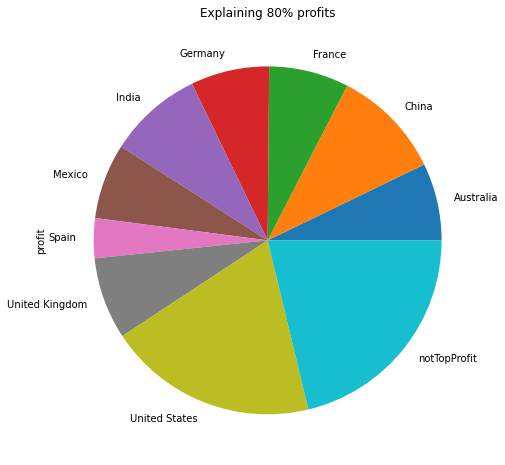

In [35]:
dfS3K_C5.groupby('country').sum()['profit'].plot(kind='pie',figsize=(8, 8), title = 'Explaining 80% profits')

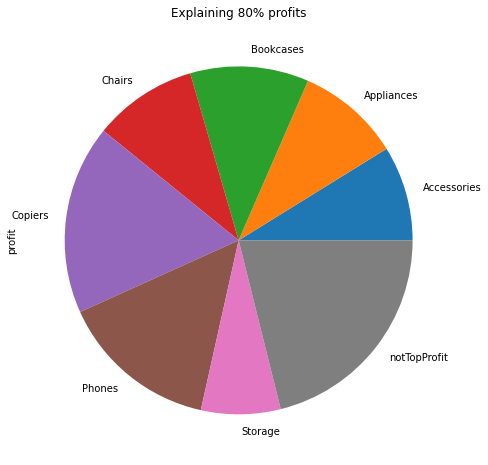

In [36]:
dfS3K_C5.groupby('sub_category').sum()['profit'].plot(kind='pie',figsize=(8, 8), title = 'Explaining 80% profits')

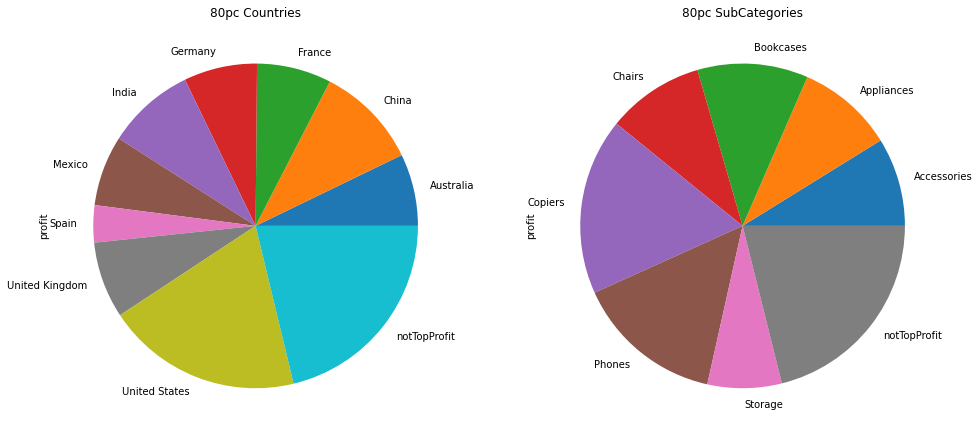

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (16,8))

dfS3K_C5.groupby('country').sum()['profit'].plot(kind='pie', title = '80pc Countries',ax=axes[0])
dfS3K_C5.groupby('sub_category').sum()['profit'].plot(kind='pie', title = '80pc SubCategories',ax=axes[1])


#Time Series

In [39]:
dfS3K_C6 = dfS3K_C5.copy()
#list(dfS3K_C6.columns)

In [40]:
dropColumns = ['ship_mode', 'segment', 'state', 
       'market', 'region', 'product_id', 'category', 
       'product_name', 'sales',  'discount', 'profit',
       'shipping_cost', 'order_priority']
dfS3K_C6.drop(dropColumns, axis=1, inplace= True)
dfS3K_C6.shape

(51290, 6)

In [42]:
#year is int, better to convert to string object
dfS3K_C6.dtypes

order_date      object
ship_date       object
country         object
sub_category    object
quantity         int64
year             int64
dtype: object

In [43]:
dfS3K_C6['year'] = dfS3K_C6['year'].astype(str)

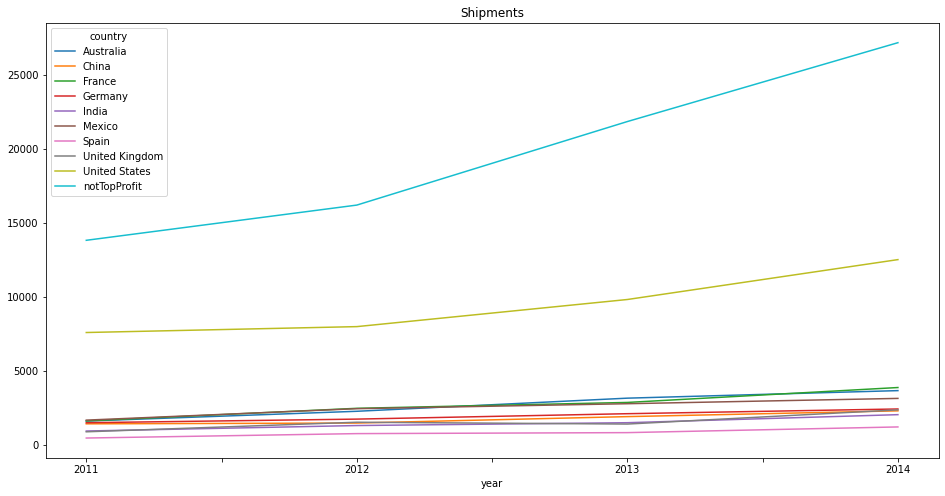

In [44]:
pd.pivot_table(dfS3K_C6, index = 'year', columns = 'country', values = 'quantity', aggfunc = 'sum').plot(figsize = (16,8),title = 'Shipments')

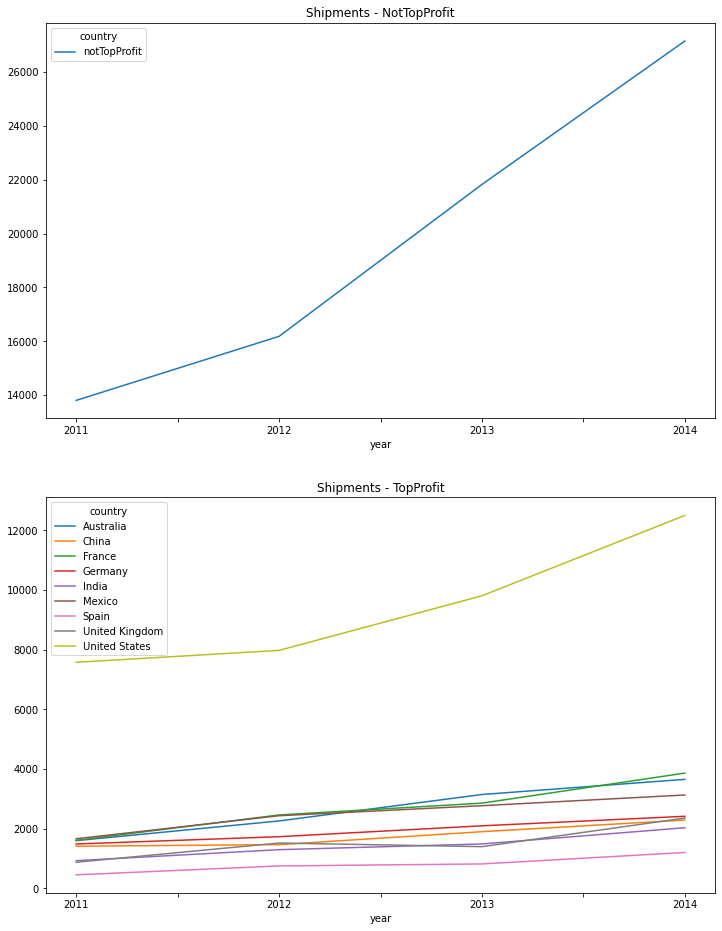

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_C6[dfS3K_C6['country'] == 'notTopProfit'], index = 'year', columns = 'country', values = 'quantity', aggfunc = 'sum').plot(ax=axes[0],title = 'Shipments - NotTopProfit')
pd.pivot_table(dfS3K_C6[dfS3K_C6['country'] != 'notTopProfit'], index = 'year', columns = 'country', values = 'quantity', aggfunc = 'sum').plot(ax=axes[1],title = 'Shipments - TopProfit')


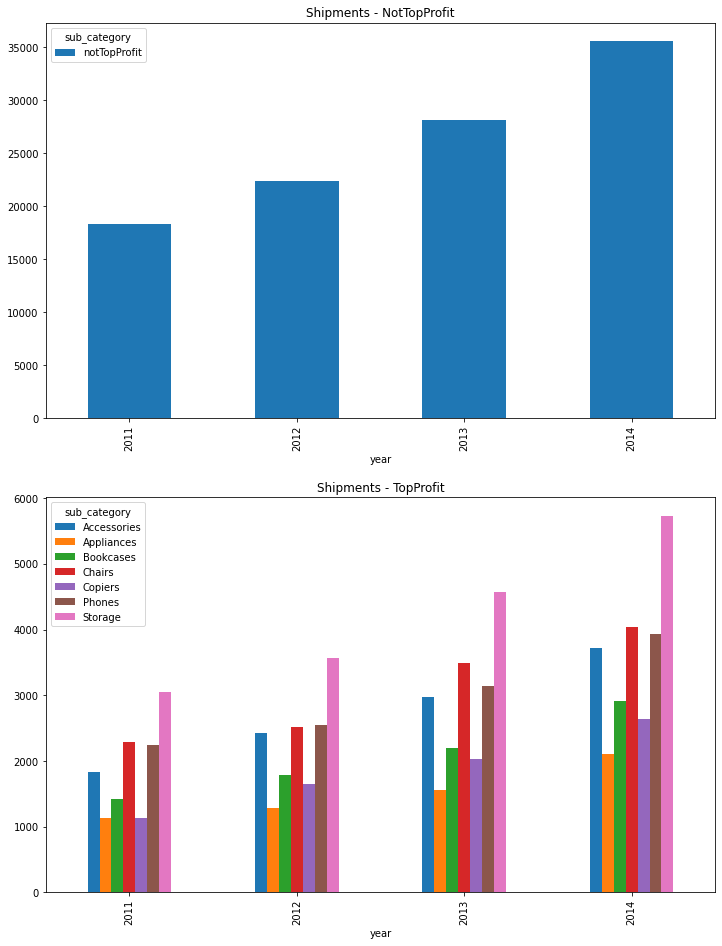

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'] == 'notTopProfit'], index = 'year', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(kind = 'bar',ax=axes[0],title = 'Shipments - NotTopProfit')
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'] != 'notTopProfit'], index = 'year', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(kind = 'bar',ax=axes[1],title = 'Shipments - TopProfit')


In [47]:
dfS3K_C6['shp-yr-mon'] = pd.to_datetime(dfS3K_C6['ship_date']).dt.strftime('%Y-%m')

In [48]:
#dfS3K_C6['shp-yr-mon'].describe

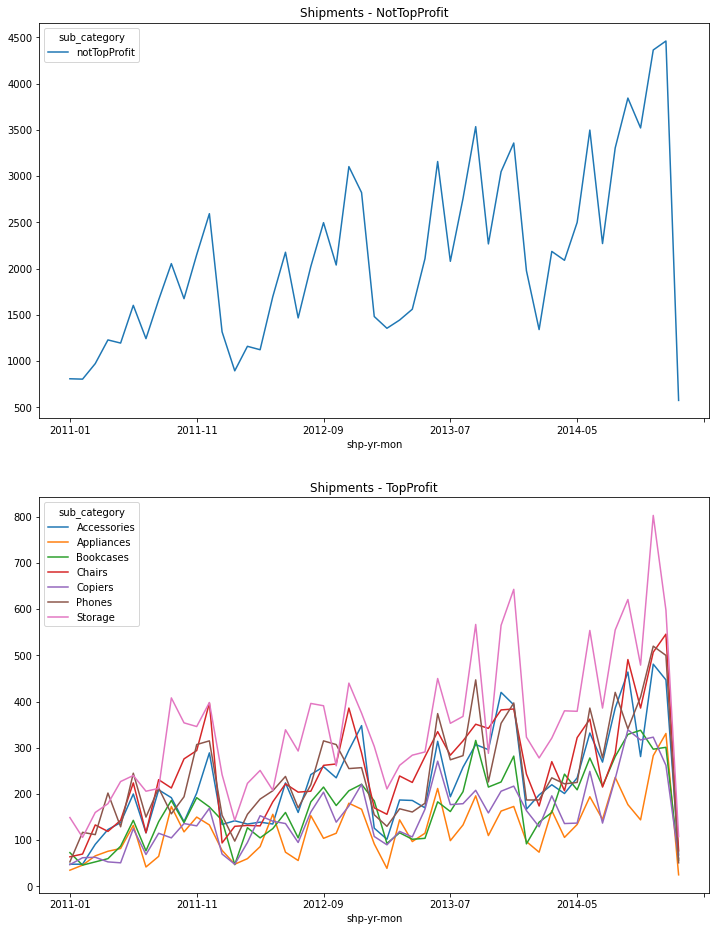

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'] == 'notTopProfit'], index = 'shp-yr-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(ax=axes[0],title = 'Shipments - NotTopProfit')
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'] != 'notTopProfit'], index = 'shp-yr-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(ax=axes[1],title = 'Shipments - TopProfit')


In [50]:
dfS3K_C6['shp-mon'] = pd.to_datetime(dfS3K_C6['ship_date']).dt.strftime('%m')
#dfS3K_C6['shp-mon'].describe

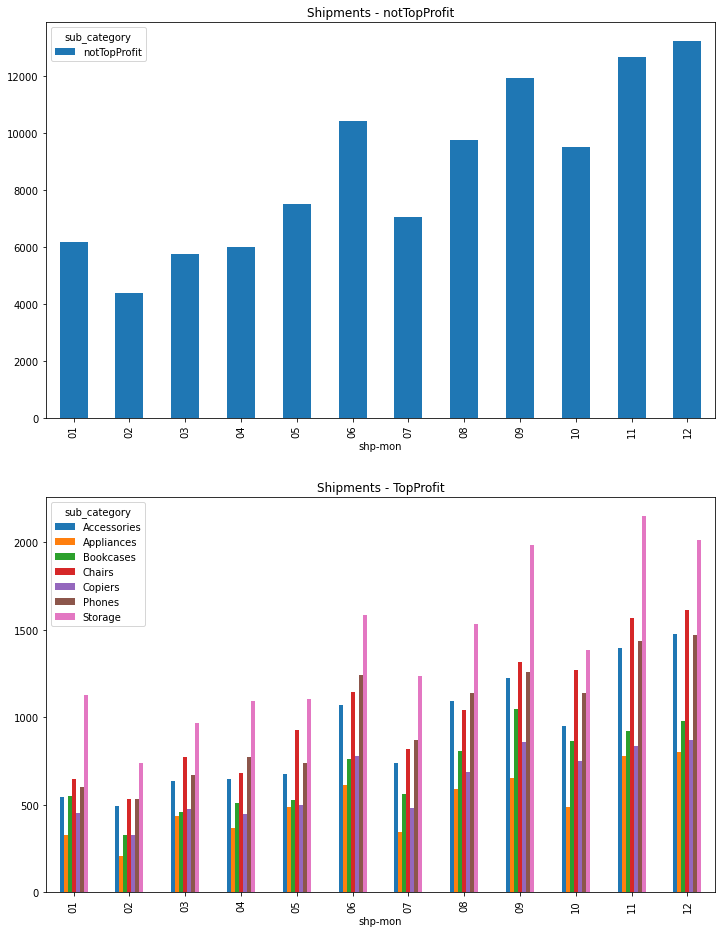

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'] == 'notTopProfit'], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(kind = 'bar',ax=axes[0],title = 'Shipments - notTopProfit')
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'] != 'notTopProfit'], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'sum').plot(kind = 'bar',ax=axes[1],title = 'Shipments - TopProfit')

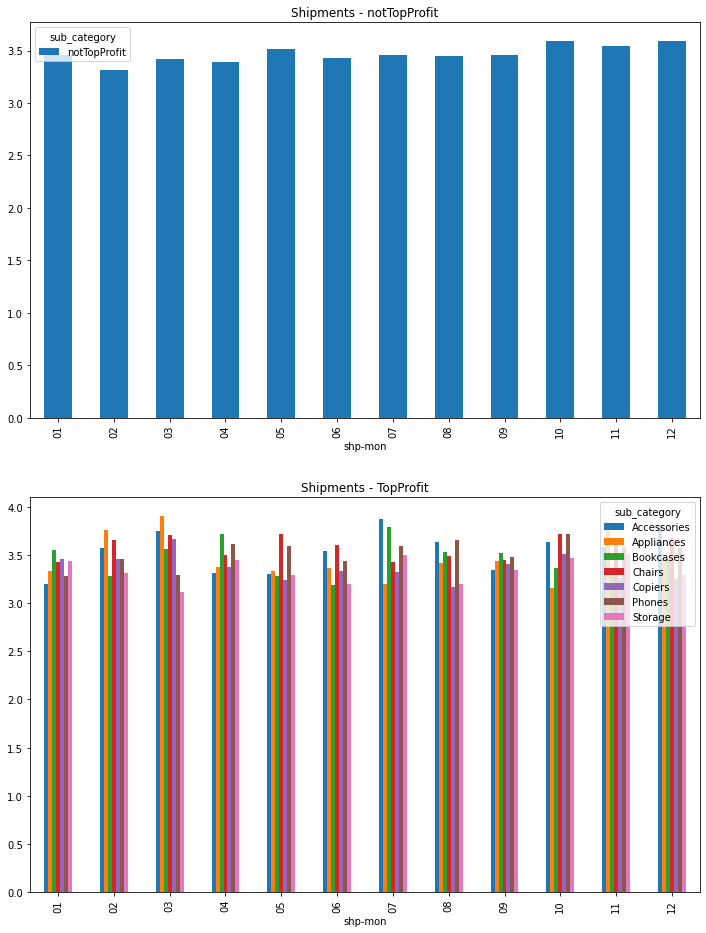

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'] == 'notTopProfit'], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'mean').plot(kind = 'bar',ax=axes[0],title = 'Shipments - notTopProfit')
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'] != 'notTopProfit'], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'mean').plot(kind = 'bar',ax=axes[1],title = 'Shipments - TopProfit')

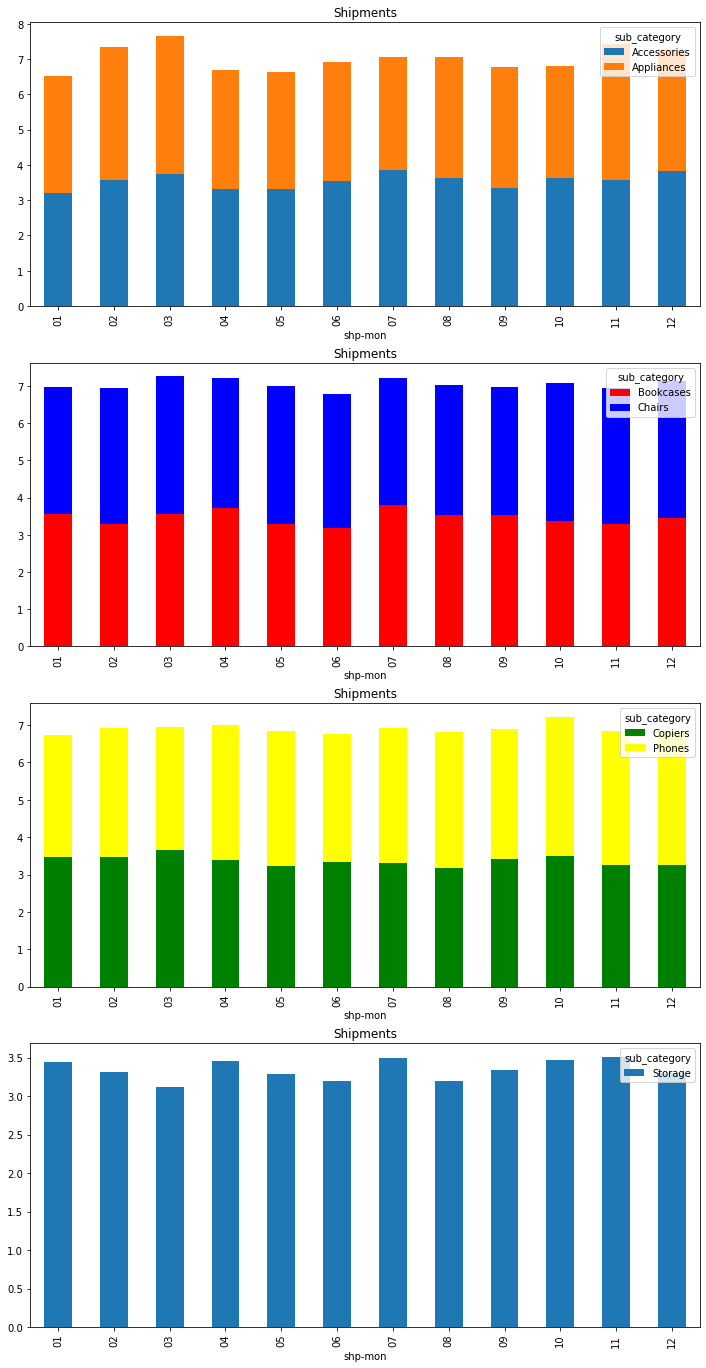

In [56]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize= (12,24))
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'].isin(['Accessories','Appliances'])], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'mean').plot(kind= 'bar', stacked = True,ax=axes[0],title = 'Shipments')
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'].isin(['Bookcases','Chairs'])], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'mean').plot(kind= 'bar', stacked = True,ax=axes[1],title = 'Shipments', color=['red','blue'])
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'].isin(['Copiers','Phones'])], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'mean').plot(kind= 'bar', stacked = True,ax=axes[2],title = 'Shipments',color=['green','yellow'])
pd.pivot_table(dfS3K_C6[dfS3K_C6['sub_category'].isin(['Storage'])], index = 'shp-mon', columns = 'sub_category', values = 'quantity', aggfunc = 'mean').plot(kind= 'bar', stacked = True,ax=axes[3],title = 'Shipments')

In [57]:
#df['Week_Number'] = df['Date'].dt.isocalendar().week
dfS3K_C6['shp-Week'] = pd.to_datetime(dfS3K_C6['ship_date']).dt.isocalendar().week

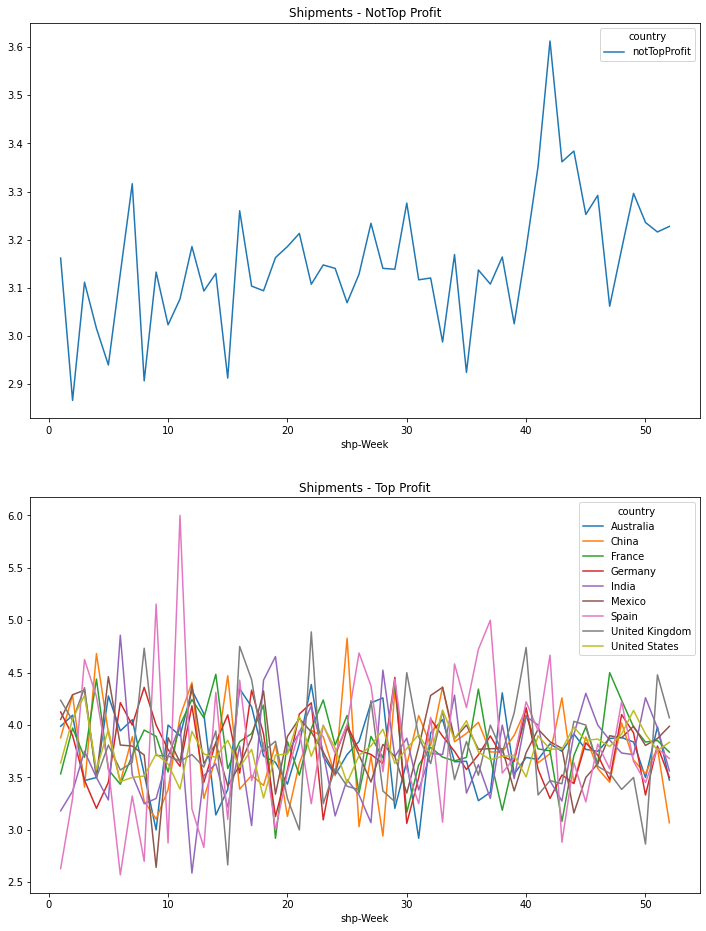

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,16))
pd.pivot_table(dfS3K_C6[dfS3K_C6['country'] == 'notTopProfit'], index = 'shp-Week', columns = 'country', values = 'quantity', aggfunc = 'mean').plot(ax=axes[0],title = 'Shipments - NotTop Profit')
pd.pivot_table(dfS3K_C6[dfS3K_C6['country'] != 'notTopProfit'], index = 'shp-Week', columns = 'country', values = 'quantity', aggfunc = 'mean').plot(ax=axes[1],title = 'Shipments - Top Profit')

#Chronobooks <br>
Two science fiction novels by Prithwis Mukerjee. A dystopian Earth. A technocratic society managed by artificial intelligence. Escape and epiphany on Mars. Can man and machine, carbon and silicon explore and escape into other dimensions of existence? An Indic perspective rooted in Advaita Vedanta and the Divine Feminine.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/CTCYFooter-1.png)